In [10]:
import numpy as np
import os
import glob
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam

In [11]:
datagen= keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.15, 
    rescale=1./255 ,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True
)
train_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web',
    target_size=(299,299),
    batch_size=32,
    shuffle=True,
    subset='training'
     )


val_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web', 
    target_size=(299, 299),
    shuffle=True,
    batch_size=32,
    subset='validation'
    )

Found 8839 images belonging to 13 classes.
Found 4346 images belonging to 13 classes.


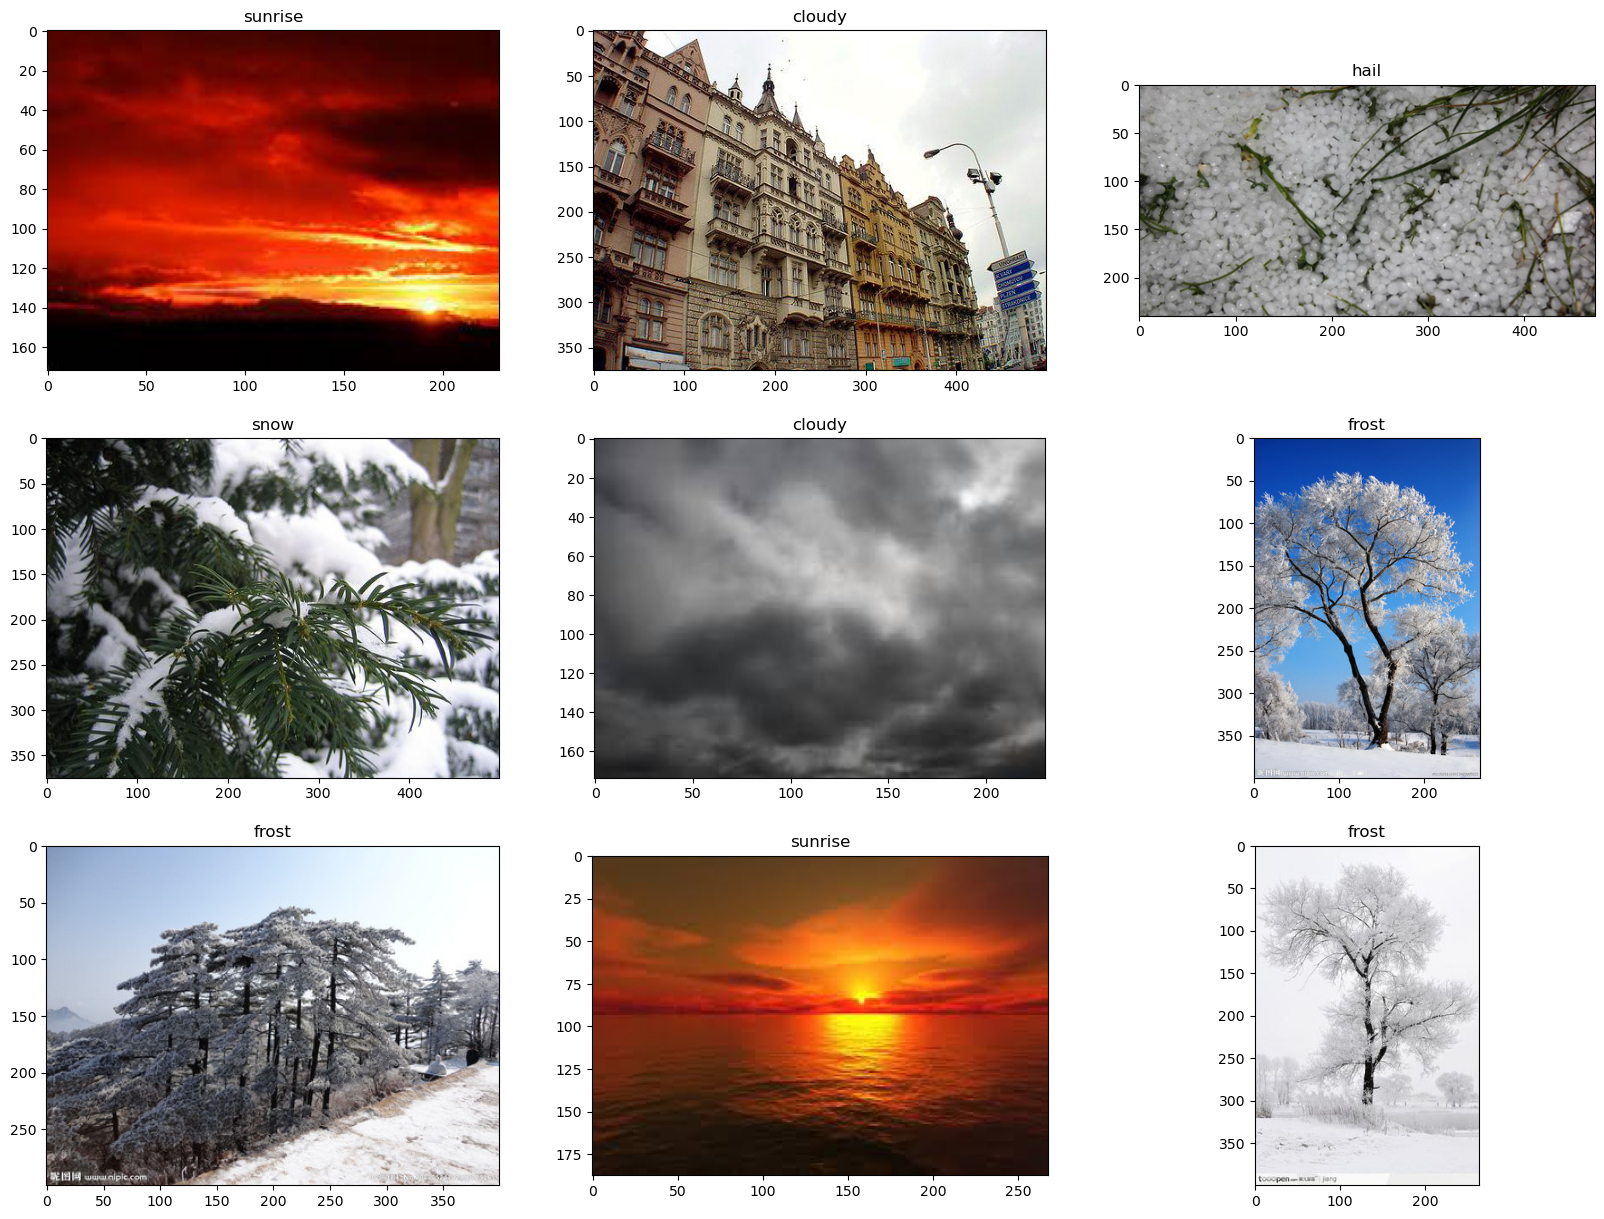

In [12]:
import random

fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()} #Словарь классов
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes])) #Разныце пути для картинок
for ax in axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [13]:
def print_loss(result): #График Loss
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [14]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
IMG_SHAPE=(299,299,3)
base_model =tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_shape=IMG_SHAPE,
    pooling=None,
    classifier_activation="softmax",
)
base_model.trainable = False

In [17]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
)
model = Sequential([
    base_model,
    layers.Dense(299, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(13, activation = 'softmax')
])

model.compile(optimizer=adam_optimizer,
              loss = keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 1000)              22910480  
                                                                 
 dense_6 (Dense)             (None, 299)               299299    
                                                                 
 dropout_3 (Dropout)         (None, 299)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               38400     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 13)                1677      
                                                                 
Total params: 23,249,856
Trainable params: 339,376
Non

In [18]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=10,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                             min_delta=0,
                                                             patience=2,
                                                             restore_best_weights=True
                                                             )])
results = model.evaluate(val_ds)


Epoch 1/10
  9/277 [..............................] - ETA: 33:03 - loss: 2.4537 - accuracy: 0.1736

KeyboardInterrupt: 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successf

In [ ]:
test_results = {}
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.50801
Test Accuracy: 84.12%


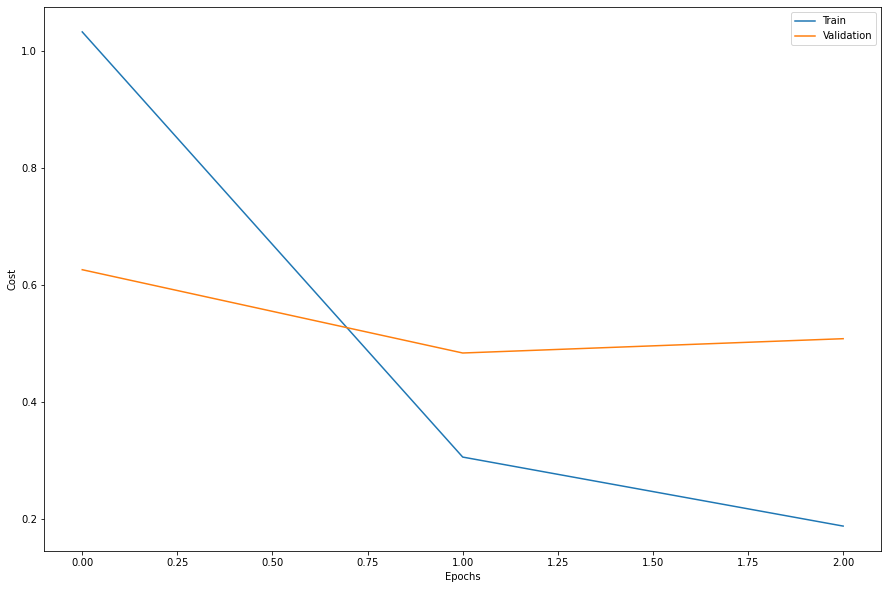

In [ ]:
print_loss(history)

In [ ]:
####model.save(r'C:\machine learning\first\first_ResNet50V2_model')